In [1]:
%matplotlib inline

In [2]:
import os.path,sys,argparse
import subprocess
import warnings
base_path = os.path.join('/home/apizzuto/Nova/scripts/','')
sys.path.append(base_path)

import pickle
import logging as log
from astropy.time import Time
from astropy.coordinates import Angle
import astropy.units as u
from config import *
import pandas as pd
from Novae import Nova
import matplotlib as mpl
import histlite as hl
mpl.style.use('/home/apizzuto/Nova/scripts/novae_plots.mplstyle')

from skylab.datasets import Datasets

import numpy as np

import matplotlib.pyplot as plt

/data/user/apizzuto/software/skylab/skylab/__init__.pyc


In [3]:
df = pd.read_pickle('/home/apizzuto/Nova/Novae_details_with_seasons.csv')
df = df.sort_values('Start Time (gamma ray)')

novae = []
seasons = []
for index, row in df.iterrows():
    a = Nova(row['Name'], 2.5, np.radians(row['RA (Deg)']), np.radians(30.),
            row['Start Time (gamma ray)'], 1000. / 86400., #row['Duration (gamma ray)'],
             flux_norm=row['SPL flux']*1e-7, cutoff = None)
    novae.append(a)
    seasons.append(row['GRECO season'])

nova = novae[2]
season = seasons[2]

sinDec_bins = np.linspace(-1., 1., 26)
energy_bins = np.linspace(0., 5., 26)

In [4]:
llh = initialize_llh(nova, season=season, fit_gamma=True)
inj = initialize_injector(nova, llh)

Initializing Point Source LLH in Skylab
Fitting gamma
Initializing Point Source COMPLETE
LLH Initialization took 7.80973219872 seconds


Initializing Point Source Injector


In [5]:
sorted(llh.llh_model._w_spline_dict.keys())[0][0][1]

0.9

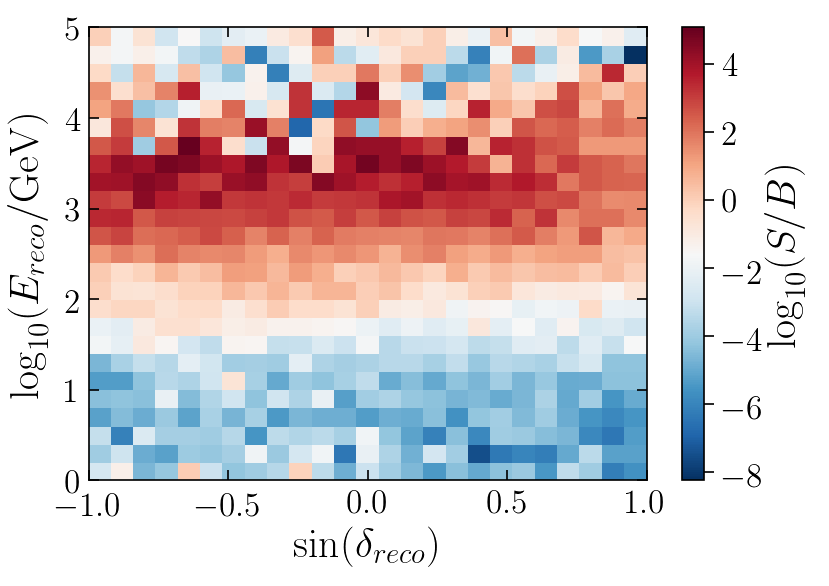

In [5]:
fig, ax = plt.subplots(dpi=150, figsize = (6,4))
fig.set_facecolor('w')
decs = sinDec_bins[:-1] + (np.diff(sinDec_bins) / 2.)
es = energy_bins[:-1] + (np.diff(energy_bins) / 2.)

e_plot = [e for e in es for dec in decs]
dec_plot = [dec for e in es for dec in decs]
H = np.array([llh.llh_model._w_spline_dict[llh.llh_model._w_spline_dict.keys()[0]]([e,dec])[0] for e in es for dec in decs])

n, energy_spline_bins, sinDec_spline_bins = np.histogram2d(e_plot, dec_plot, bins=[energy_bins, sinDec_bins], 
                                                  weights = H)

X, Y = np.meshgrid(sinDec_spline_bins, energy_spline_bins)
cax = plt.pcolormesh(X, Y, n, cmap = plt.cm.RdBu_r, shading='gourard')
cbar = plt.colorbar()
cbar.set_label(r'$\log_{10} (S / B)$', fontsize = 20)
cbar.ax.tick_params(axis='y', direction='out')
plt.ylim(0.,5.)
plt.xlabel(r'$\sin ( \delta_{reco})$', fontsize = 20)
plt.ylabel(r'$\log_{10} (E_{reco} / \mathrm{GeV})$', fontsize = 20)
plt.show()

In [7]:
gam

(('gamma', 1.0),)

In [10]:
?plt.pcolormesh

Initializing Point Source LLH in Skylab
Fitting gamma
Initializing Point Source COMPLETE
LLH Initialization took 7.41813087463 seconds


Initializing Point Source Injector


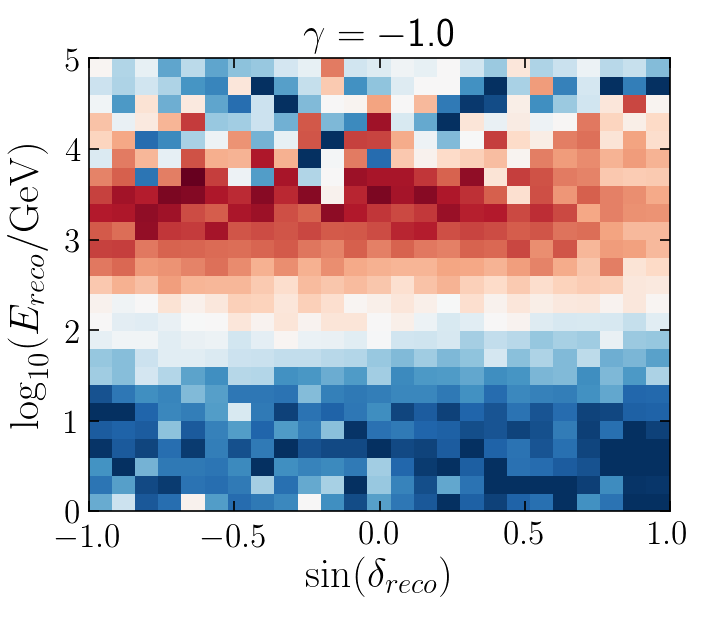

Initializing Point Source LLH in Skylab
Fitting gamma
Initializing Point Source COMPLETE
LLH Initialization took 7.50710010529 seconds


Initializing Point Source Injector


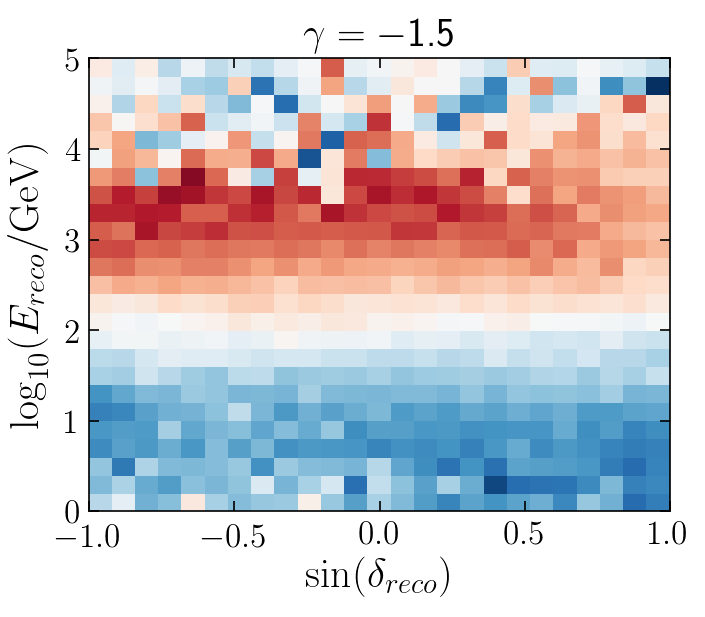

Initializing Point Source LLH in Skylab
Fitting gamma
Initializing Point Source COMPLETE
LLH Initialization took 7.41680312157 seconds


Initializing Point Source Injector


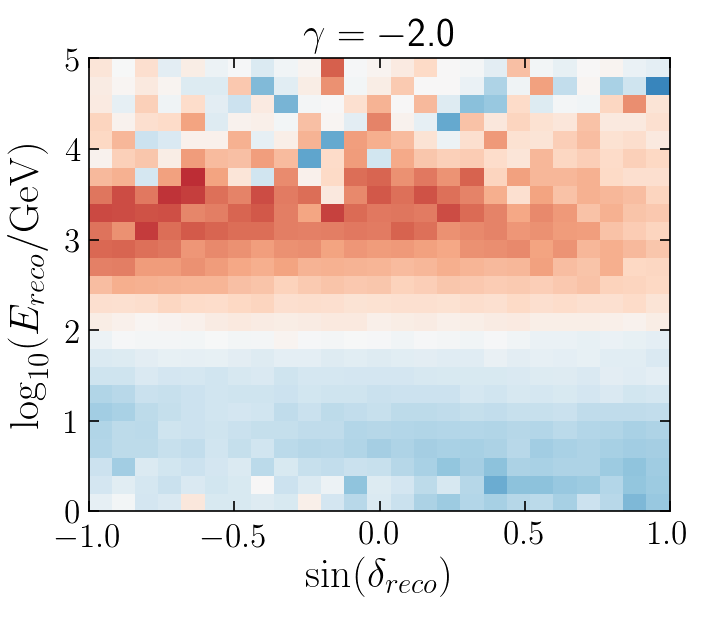

Initializing Point Source LLH in Skylab
Fitting gamma
Initializing Point Source COMPLETE
LLH Initialization took 7.78072810173 seconds


Initializing Point Source Injector


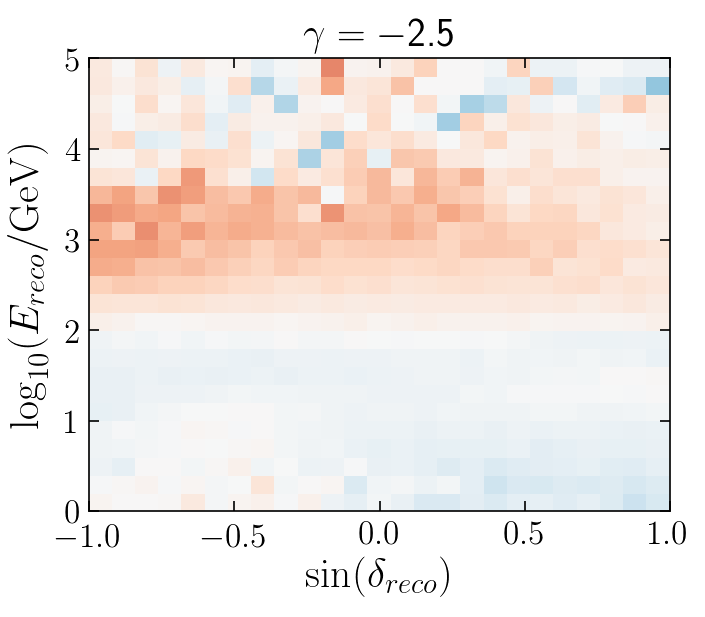

Initializing Point Source LLH in Skylab
Fitting gamma
Initializing Point Source COMPLETE
LLH Initialization took 7.70081591606 seconds


Initializing Point Source Injector


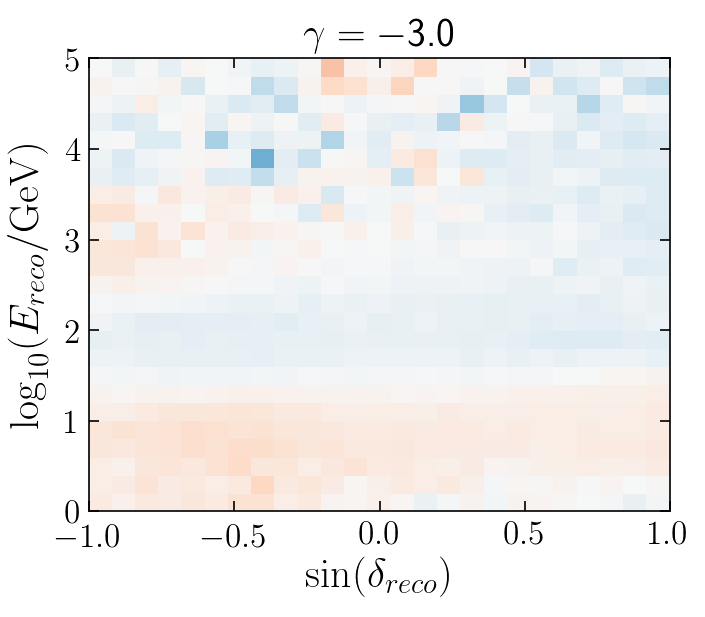

Initializing Point Source LLH in Skylab
Fitting gamma
Initializing Point Source COMPLETE
LLH Initialization took 7.55303907394 seconds


Initializing Point Source Injector


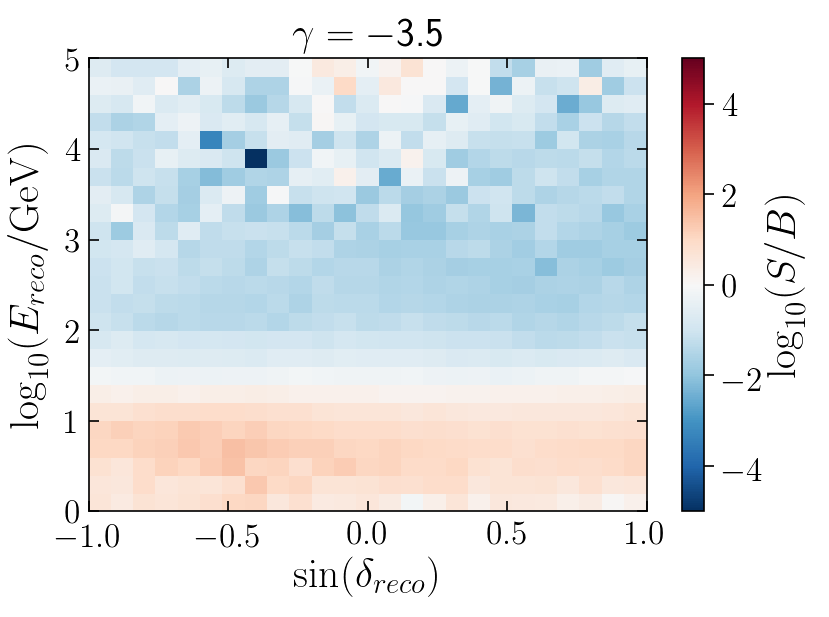

In [19]:
keys = sorted(llh.llh_model._w_spline_dict.keys())[1::5]

endrow = 5

for i, gam in enumerate(keys[:6]):
    llh = initialize_llh(nova, season=season, fit_gamma=True)
    inj = initialize_injector(nova, llh)

    figsize = (6,4) if i == endrow else (5,4)
    fig, ax = plt.subplots(dpi=150, figsize = figsize)
    fig.set_facecolor('w')
    decs = sinDec_bins[:-1] + (np.diff(sinDec_bins) / 2.)
    es = energy_bins[:-1] + (np.diff(energy_bins) / 2.)

    e_plot = [e for e in es for dec in decs]
    dec_plot = [dec for e in es for dec in decs]
    H = np.array([llh.llh_model._w_spline_dict[gam]([e,dec])[0] for e in es for dec in decs])

    n, energy_spline_bins, sinDec_spline_bins = np.histogram2d(e_plot, dec_plot, bins=[energy_bins, sinDec_bins], 
                                                      weights = H)

    X, Y = np.meshgrid(sinDec_spline_bins, energy_spline_bins)
    cax = plt.pcolormesh(X, Y, n, cmap = plt.cm.RdBu_r, shading='flat', vmin=-5, vmax=5)
    if i == endrow:
        cbar = plt.colorbar()
        cbar.set_label(r'$\log_{10} (S / B)$', fontsize = 20)
        cbar.ax.tick_params(axis='y', direction='out')
    plt.ylim(0.,5.)
    plt.title(r'$\gamma = -$' + str(gam[0][1]))
    plt.xlabel(r'$\sin ( \delta_{reco})$', fontsize = 20)
    plt.ylabel(r'$\log_{10} (E_{reco} / \mathrm{GeV})$', fontsize = 20)
    plt.show()